In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [20]:
def Cumulation(val, i_c):
    cumus = np.zeros(i_c)
    for i in range(i_c):
        cumus[i] = val[i_c-i:i_c+i].sum()
    return cumus

In [21]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["xtick.minor.visible"] = True 
plt.rcParams["ytick.minor.visible"] = True 

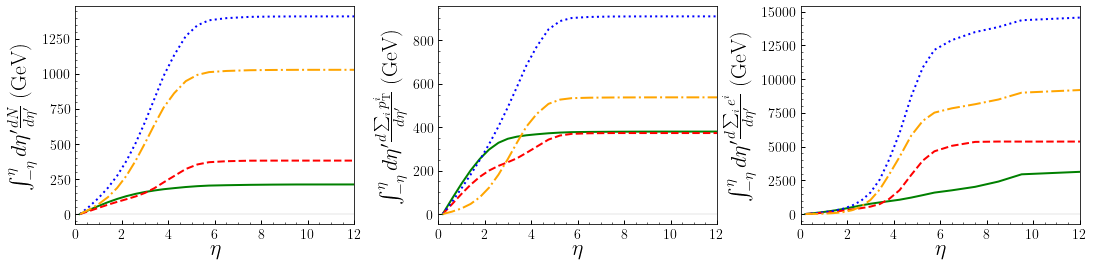

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharex='col', sharey=False,
                        gridspec_kw={'hspace': 0, 'wspace': 0.3,'width_ratios': (1,1,1)})
ax1, ax2, ax3  = axs

for ax in axs:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$\eta$', fontsize=22, labelpad=-2)
    ax.tick_params(width = 1, length = 4, pad=5)
    #ax.label_outer()
    ax.axhline(0, color = "black", linewidth=0.2, alpha=0.5)
    ax.set_xlim(0,12)

# ax2.set_xticks([0,0.2,0.4,0.6,0.8, 1.0])

# ax2.set_xlim(0,1.0)

# ax1.set_ylim(0.5,1500)
ax1.set_ylabel(r'$\int^\eta_{-\eta} d{\eta^\prime}\frac{dN}{d\eta^\prime}$ (GeV)', fontsize=22, labelpad=6)
ax2.set_ylabel(r'$\int^\eta_{-\eta} d{\eta^\prime}\frac{d\sum_i p^i_{\mathrm{T}}}{d\eta^\prime}$ (GeV)', fontsize=22, labelpad=6)
ax3.set_ylabel(r'$\int^\eta_{-\eta} d{\eta^\prime}\frac{d\sum_i e^i}{d\eta^\prime}$ (GeV)', fontsize=22, labelpad=6)
#ax4.set_ylabel(r'$\frac{d\sum_i p^i_z}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
# ax2.set_ylabel(r'Ratio to Exp. Data', fontsize=13, labelpad=14)

# ax2.set_ylim(0.5,1.5)

# ax1.set_yscale("log")

# ax1.text(0.975, 800, r'$pp,\,5.02$ TeV', fontsize = 18, ha = 'right')
# # ax2.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')
# # ax3.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')

# ##########################################################################################################

dir = '/Users/yasukitachibana/GoogleDrive/Codes/JetAnalysis/RapDist/'
file1 = dir +'/PP/5020_PP_Colorless/Full/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
file2 = dir +'/MATTER_LBT_RunningAlphaS_Q2qhat/5020_PbPb_0-5_0.30_2.0_1/Full/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
file3 = dir +'MATTER_LBT_RunningAlphaS_Q2qhat/5020_PbPb_0-5_0.30_2.0_1/Pos/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
file4 = dir +'MATTER_LBT_RunningAlphaS_Q2qhat/5020_PbPb_0-5_0.30_2.0_1/Neg/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'

val = ['n','pt','e','pz']


for i in range(3):


    data1 = np.loadtxt(file1.format(val[i]), comments='#')
    data2 = np.loadtxt(file2.format(val[i]), comments='#')
    data3 = np.loadtxt(file3.format(val[i]), comments='#')
    data4 = np.loadtxt(file4.format(val[i]), comments='#')


    xlen = len(data1[:,0])
    i_p = int(xlen/2)

    x1 = data1[i_p:,0]
    dx1 = data1[:,2]-data1[:,1]
    y1 = Cumulation(data1[:,3]*dx1,i_p)

    x2 = data2[i_p:,0]
    dx2 = data2[:,2]-data2[:,1]
    y2 = Cumulation(data2[:,3]*dx2,i_p)

    x3 = data3[i_p:,0]
    dx3 = data3[:,2]-data3[:,1]
    y3 = Cumulation(data3[:,3]*dx3,i_p)

    x4 = data4[i_p:,0]
    dx4 = data4[:,2]-data4[:,1]
    y4 = -Cumulation(data4[:,3]*dx4,i_p)




    axs[i].plot( x1, y1, color='green', linewidth=2, label='pp', linestyle = 'solid' )
    axs[i].plot( x2, y2, color='red', linewidth=2, label='PbPb', linestyle = 'dashed' )
    axs[i].plot( x3, y3, color='blue', linewidth=2, label='PbPb\n(positives)', linestyle = 'dotted' )
    axs[i].plot( x4, y4, color='orange', linewidth=2, label='PbPb\n(negatives)', linestyle = 'dashdot' )

# ##########################################################################################################
    

# ax1.text(0.04, 0.8, r'MATTER (vacuum)'+'\n'+r'anti-$k_t$, $R=0.4$'+'\n'+r'$p_{\mathrm{T}}^{\mathrm{jet}}>120$ GeV, $|\eta_{\mathrm {jet}}|<1.6$'+'\n'+r'$p_{\mathrm{T}}^{\mathrm{trk}}>0.7$ GeV', fontsize = 13, ha = 'left')
# ax2.text(0.04, 0.6, 'Sideband subtraction $1.5<|\Delta \eta| <2.5$', fontsize = 13, ha = 'left')



#ax1.legend(bbox_to_anchor=(1.07, 1.0), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=14,edgecolor='none', frameon=True, facecolor='none')
# # ax2.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')
# # ax3.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')


plt.savefig("eta_dist_run_qhat_Int.pdf")

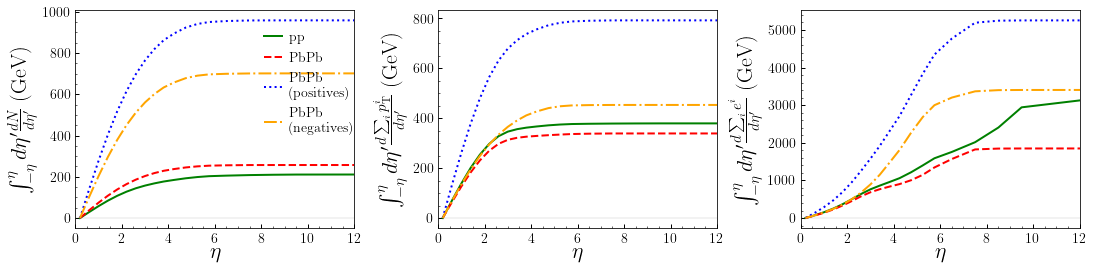

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharex='col', sharey=False,
                        gridspec_kw={'hspace': 0, 'wspace': 0.3,'width_ratios': (1,1,1)})
ax1, ax2, ax3  = axs

for ax in axs:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$\eta$', fontsize=22, labelpad=-2)
    ax.tick_params(width = 1, length = 4, pad=5)
    #ax.label_outer()
    ax.axhline(0, color = "black", linewidth=0.2, alpha=0.5)
    ax.set_xlim(0,12)

# ax2.set_xticks([0,0.2,0.4,0.6,0.8, 1.0])

# ax2.set_xlim(0,1.0)

# ax1.set_ylim(0.5,1500)
ax1.set_ylabel(r'$\int^\eta_{-\eta} d{\eta^\prime}\frac{dN}{d\eta^\prime}$ (GeV)', fontsize=22, labelpad=6)
ax2.set_ylabel(r'$\int^\eta_{-\eta} d{\eta^\prime}\frac{d\sum_i p^i_{\mathrm{T}}}{d\eta^\prime}$ (GeV)', fontsize=22, labelpad=6)
ax3.set_ylabel(r'$\int^\eta_{-\eta} d{\eta^\prime}\frac{d\sum_i e^i}{d\eta^\prime}$ (GeV)', fontsize=22, labelpad=6)
#ax4.set_ylabel(r'$\frac{d\sum_i p^i_z}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
# ax2.set_ylabel(r'Ratio to Exp. Data', fontsize=13, labelpad=14)

# ax2.set_ylim(0.5,1.5)

# ax1.set_yscale("log")

# ax1.text(0.975, 800, r'$pp,\,5.02$ TeV', fontsize = 18, ha = 'right')
# # ax2.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')
# # ax3.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')

# ##########################################################################################################

dir = '/Users/yasukitachibana/GoogleDrive/Codes/JetAnalysis/RapDist/'
file1 = dir +'/PP/5020_PP_Colorless/Full/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
file2 = dir +'/MATTER_LBT_RunningAlphaS_Q2qhat/5020_PbPb_0-5_0.30_2.0_1/PP_Full/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
file3 = dir +'MATTER_LBT_RunningAlphaS_Q2qhat/5020_PbPb_0-5_0.30_2.0_1/PP_Pos/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
file4 = dir +'MATTER_LBT_RunningAlphaS_Q2qhat/5020_PbPb_0-5_0.30_2.0_1/PP_Neg/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'

val = ['n','pt','e','pz']


for i in range(3):


    data1 = np.loadtxt(file1.format(val[i]), comments='#')
    data2 = np.loadtxt(file2.format(val[i]), comments='#')
    data3 = np.loadtxt(file3.format(val[i]), comments='#')
    data4 = np.loadtxt(file4.format(val[i]), comments='#')


    xlen = len(data1[:,0])
    i_p = int(xlen/2)

    x1 = data1[i_p:,0]
    dx1 = data1[:,2]-data1[:,1]
    y1 = Cumulation(data1[:,3]*dx1,i_p)

    x2 = data2[i_p:,0]
    dx2 = data2[:,2]-data2[:,1]
    y2 = Cumulation(data2[:,3]*dx2,i_p)

    x3 = data3[i_p:,0]
    dx3 = data3[:,2]-data3[:,1]
    y3 = Cumulation(data3[:,3]*dx3,i_p)

    x4 = data4[i_p:,0]
    dx4 = data4[:,2]-data4[:,1]
    y4 = -Cumulation(data4[:,3]*dx4,i_p)




    axs[i].plot( x1, y1, color='green', linewidth=2, label='pp', linestyle = 'solid' )
    axs[i].plot( x2, y2, color='red', linewidth=2, label='PbPb', linestyle = 'dashed' )
    axs[i].plot( x3, y3, color='blue', linewidth=2, label='PbPb\n(positives)', linestyle = 'dotted' )
    axs[i].plot( x4, y4, color='orange', linewidth=2, label='PbPb\n(negatives)', linestyle = 'dashdot' )

# ##########################################################################################################
    

# ax1.text(0.04, 0.8, r'MATTER (vacuum)'+'\n'+r'anti-$k_t$, $R=0.4$'+'\n'+r'$p_{\mathrm{T}}^{\mathrm{jet}}>120$ GeV, $|\eta_{\mathrm {jet}}|<1.6$'+'\n'+r'$p_{\mathrm{T}}^{\mathrm{trk}}>0.7$ GeV', fontsize = 13, ha = 'left')
# ax2.text(0.04, 0.6, 'Sideband subtraction $1.5<|\Delta \eta| <2.5$', fontsize = 13, ha = 'left')



ax1.legend(bbox_to_anchor=(1.07, 1.0), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=14,edgecolor='none', frameon=True, facecolor='none')
# # ax2.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')
# # ax3.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')


plt.savefig("eta_dist_run_qhat_Int_pp.pdf")